In [1]:
from utils import *

In [33]:
numberEdgesDict = {}
averageDegreesDict = {}
clusteringCoeffDict = {}
averagePathLenghtDict = {}

In [6]:
def createGraphFromCorrelationMatrix(threshold):
    if not os.path.exists(correlationMatricesPath):
        print("Correlation matrices folder doesn't exist")
        return None
    dirList = os.listdir(correlationMatricesPath)

    if not os.path.exists(graphsPath):
        os.makedirs(graphsPath)

    labels = binaryToData("Parcellation_labels")

    for filename in dirList:
        corrMatrix = np.loadtxt(correlationMatricesPath + '/' + filename, delimiter=',')

        graph = nx.Graph()
        rows, columns = corrMatrix.shape

        for i in range(rows):
            for j in range(columns):
                edgeWeight = corrMatrix[i][j]
                if edgeWeight >= threshold:
                    graph.add_edge(i, j, weight=edgeWeight)
            
        graph.remove_edges_from(nx.selfloop_edges(graph))

        print(graph.number_of_edges())

        newFilename = filename.replace('.csv', '')
        newThreshold = str(threshold).replace('.', '')
        dataToBinary(graph, graphsPath + '/' + newFilename + '_t' + newThreshold)

    print("Networkx graphs created successfuly")


In [80]:
def saveNetworkProperties():
    if not os.path.exists(graphsPath):
        print("Graph networks folder doesn't exist")
        return None
    dirList = os.listdir(graphsPath)

    numberEdgesDict.clear()
    clusteringCoeffDict.clear()

    for filename in dirList:
        graph = binaryToData(graphsPath + '/' + filename)

        edges = graph.number_of_edges()
        clusteringCoeff = nx.average_clustering(graph)
        
        splitChar = '_'
        splitName = filename.split(splitChar)
        res = splitChar.join(splitName[:4]), splitChar.join(splitName[4:5]), splitChar.join(splitName[5:])
        patientKey = res[0]
        dateKey = res[1]
        thresholdKey = res[2]

        dateKeyIndex = 0
        if dateKey == 'Baseline':
            dateKeyIndex = 0
        elif dateKey == '3Month':
            dateKeyIndex = 0
        elif dateKey == '6Month':
            dateKeyIndex = 1
        elif dateKey == '1Year':
            dateKeyIndex = 0
        elif dateKey == '2Year':
            dateKeyIndex = 1

        edgesList = []
        if patientKey in numberEdgesDict:
            edgesList = numberEdgesDict[patientKey]
        edgesList.insert(dateKeyIndex, edges)
        numberEdgesDict[patientKey] = edgesList

        clusteringCoeffList = []
        if patientKey in clusteringCoeffDict:
            clusteringCoeffList = clusteringCoeffDict[patientKey]
        clusteringCoeffList.insert(dateKeyIndex, clusteringCoeff)
        clusteringCoeffDict[patientKey] = clusteringCoeffList


        print()
    
    

In [81]:
#createGraphFromCorrelationMatrix(0.7)
saveNetworkProperties()

AD_002_S_5018_1Year_t07
0.7592564375610728

AD_002_S_5018_3Month_t07
0.6670660158949038

AD_002_S_5018_6Month_t07
0.771766127373405

AD_002_S_5018_Baseline_t07
0.8733898778599268

AD_006_S_4153_1Year_t07
0.927626779982988

AD_006_S_4153_2Year_t07
0.8283897770746755

AD_006_S_4153_3Month_t07
0.6936198838614092

AD_006_S_4153_6Month_t07
0.8110851019623131

AD_006_S_4153_Baseline_t07
0.6481068962872794

AD_006_S_4192_1Year_t07
0.8071600497013418

AD_006_S_4192_2Year_t07
0.7865241461285596

AD_006_S_4192_3Month_t07
0.9261309606528735

AD_006_S_4192_6Month_t07
0.8089171817952046

AD_006_S_4192_Baseline_t07
0.7175215575923584

AD_006_S_4546_3Month_t07
0.7498000420399122

AD_006_S_4546_6Month_t07
0.46337287110893915

AD_006_S_4546_Baseline_t07
0.5356700806711766

AD_006_S_4867_1Year_t07
0.7988696959087112

AD_006_S_4867_3Month_t07
0.7912816732565264

AD_006_S_4867_6Month_t07
0.41541313666599666

AD_006_S_4867_Baseline_t07
0.8385981998615758

AD_013_S_5071_3Month_t07
0.6979298779651564

AD_013

In [82]:
def showPropertyEvolutionGraph(filenameID, metric):
    labels = ['Baseline', '3Month', '6Month', '1Year', '2Year']
    values = []
    if metric == 'edges':
        values = numberEdgesDict[filenameID]
    elif metric == 'clustering':
        values = clusteringCoeffDict[filenameID]
    listSize = len(values)
    labels = labels[:listSize]

    plt.plot(labels, values)
    plt.xlabel('Date of fMRI')
    plt.ylabel('Number of edges')
    plt.title('Number of edges of each fMRI graph for patient ID ' + filenameID)
    plt.show()

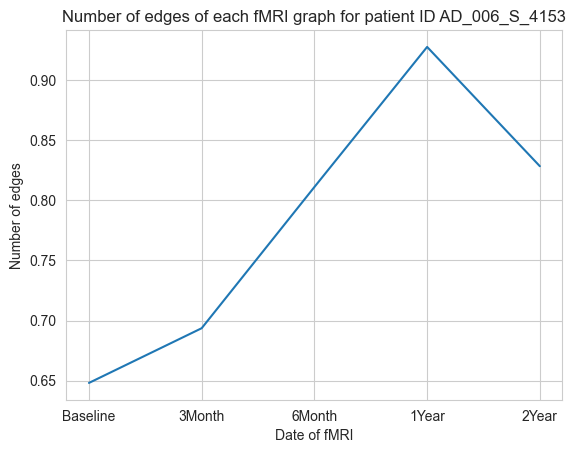

In [87]:
showPropertyEvolutionGraph('AD_006_S_4153', 'clustering')